# Week [No.] - Exploratory Data Analysis & Dasar Preprocessing

---

<img src="https://www.edureka.co/blog/wp-content/uploads/2018/08/Insurance-Leadspace-Aniamted.gif" alt="Data Analytics" width=800>

In [10]:
# Untuk generate angka random dengan studi kasus tertentu
import numpy as np

# Dataframe
import pandas as pd

# Lib visualisasi well-known & praktis
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset sample
from sklearn.datasets import load_iris

# Preprocessing with python lib
from sklearn.impute import SimpleImputer

## Exploratory Data Analysis

![iris flower](https://raw.githubusercontent.com/Masterx-AI/Project_Horse_Sruvival_Prognostication/main/horse.jpg)

sauce : https://www.kaggle.com/datasets/yasserh/horse-survival-dataset

In [51]:
# load data quda
horse_health_data = pd.read_csv("predict-horses-health.csv")

# W/o Visualization

In [ ]:
# data berikan saya info
horse_health_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     1235 non-null   int64  
 1   surgery                1235 non-null   object 
 2   age                    1235 non-null   object 
 3   hospital_number        1235 non-null   int64  
 4   rectal_temp            1235 non-null   float64
 5   pulse                  1235 non-null   float64
 6   respiratory_rate       1235 non-null   float64
 7   temp_of_extremities    1196 non-null   object 
 8   peripheral_pulse       1175 non-null   object 
 9   mucous_membrane        1214 non-null   object 
 10  capillary_refill_time  1229 non-null   object 
 11  pain                   1191 non-null   object 
 12  peristalsis            1215 non-null   object 
 13  abdominal_distention   1212 non-null   object 
 14  nasogastric_tube       1155 non-null   object 
 15  naso

In [52]:
# Melihat 5 data teratas
horse_health_data.head(5)

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,0,yes,adult,530001,38.1,132.0,24.0,cool,reduced,dark_cyanotic,...,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no,died
1,1,yes,adult,533836,37.5,88.0,12.0,cool,normal,pale_cyanotic,...,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no,euthanized
2,2,yes,adult,529812,38.3,120.0,28.0,cool,reduced,pale_pink,...,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no,lived
3,3,yes,adult,5262541,37.1,72.0,30.0,cold,reduced,pale_pink,...,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes,lived
4,4,no,adult,5299629,38.0,52.0,48.0,normal,normal,normal_pink,...,47.0,7.3,cloudy,2.6,no,0,0,0,yes,lived


In [53]:
# Melihat 5 data terbawah
horse_health_data.tail(5)

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
1230,1230,yes,adult,535246,38.5,129.0,48.0,cool,reduced,pale_pink,...,57.0,66.0,serosanguious,2.0,yes,2206,0,0,no,lived
1231,1231,yes,adult,528570,37.5,60.0,50.0,cool,reduced,pale_cyanotic,...,35.0,6.4,serosanguious,3.6,yes,2209,0,0,yes,died
1232,1232,yes,young,529685,37.5,84.0,40.0,normal,reduced,normal_pink,...,40.0,5.9,cloudy,7.0,yes,400,0,0,yes,lived
1233,1233,yes,adult,534784,38.1,70.0,16.0,normal,reduced,bright_red,...,58.0,74.0,cloudy,2.0,yes,2209,0,0,no,lived
1234,1234,yes,adult,528548,38.1,54.0,36.0,normal,normal,pale_pink,...,45.0,6.0,clear,3.6,yes,2124,0,0,yes,lived


In [54]:
# Simple Descriptive Statistics
horse_health_data.describe()

,id,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
count,1235.0000,1.235000e+03,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000
mean,617.0000,9.545004e+05,38.202186,79.574089,30.054251,4.382591,49.602429,21.388016,3.290931,3832.496356,14.612146,3.577328
std,356.6581,1.356403e+06,0.788668,29.108638,16.452066,1.937357,10.535800,26.676453,1.589195,5436.733774,193.705735,88.858953
min,0.0000,5.213990e+05,35.400000,30.000000,8.000000,1.000000,23.000000,3.500000,0.100000,0.000000,0.000000,0.000000
25%,308.5000,5.288000e+05,37.800000,53.000000,18.000000,2.000000,43.000000,6.600000,2.000000,2205.000000,0.000000,0.000000
50%,617.0000,5.297770e+05,38.200000,76.000000,28.000000,4.500000,48.000000,7.500000,3.000000,2209.000000,0.000000,0.000000
75%,925.5000,5.341450e+05,38.600000,100.000000,36.000000,6.000000,57.000000,9.100000,4.300000,3205.000000,0.000000,0.000000
max,1234.0000,5.305129e+06,40.800000,184.000000,96.000000,7.500000,75.000000,89.000000,10.100000,41110.000000,3112.000000,2209.000000


In [ ]:
# Data Shape
horse_health_data.shape

(150, 4)

In [57]:
# Unique
label = horse_health_data["outcome"]
print(f"Number of unique values : {label.nunique()}")
print(f"List of unique values : {label.unique()}")
print(f"Total of each unique values :\n{label.value_counts()}")

Number of unique values : 3
List of unique values : ['died' 'euthanized' 'lived']
Total of each unique values :
outcome
lived         574
died          410
euthanized    251
Name: count, dtype: int64


In [58]:
# missing values
horse_health_data.isna().sum()

id                         0
surgery                    0
age                        0
hospital_number            0
rectal_temp                0
pulse                      0
respiratory_rate           0
temp_of_extremities       39
peripheral_pulse          60
mucous_membrane           21
capillary_refill_time      6
pain                      44
peristalsis               20
abdominal_distention      23
nasogastric_tube          80
nasogastric_reflux        21
nasogastric_reflux_ph      0
rectal_exam_feces        190
abdomen                  213
packed_cell_volume         0
total_protein              0
abdomo_appearance         48
abdomo_protein             0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
outcome                    0
dtype: int64

# Data Query

# With visualization

In [ ]:
# untuk dengan visualisasi kita coba dengan dataset lainnya
aapl_data = pd.read_csv("aapl_stock_price.csv", index_col=[0], parse_dates=[0])

## Line chart

Line graphs, on the other hand, are used to show a trend over time, also known as a time series. They are best used for continuous data, especially when it's important to represent the changes in the data over time. For example, showing how a stock price has changed over the past year, tracking temperature changes over a week, etc. <br>
Sumber : https://www.mokkup.ai/blogs/difference-between-bar-graphs-and-line-graphs/

In [39]:
def lineplot_stock(data, ticker):
    _, axes = plt.subplots(2, 1, figsize=(15, 7))

    axes[0].plot(data.index, data['Close'])
    axes[0].set_title('Close Price')
    axes[0].grid("True")

    axes[1].plot(data.index, data['Volume'], color='green')
    axes[0].set_title('Volume')
    axes[1].grid("True")

    plt.suptitle(ticker + " Stock Price Overtime", y=0.97, fontsize=18)

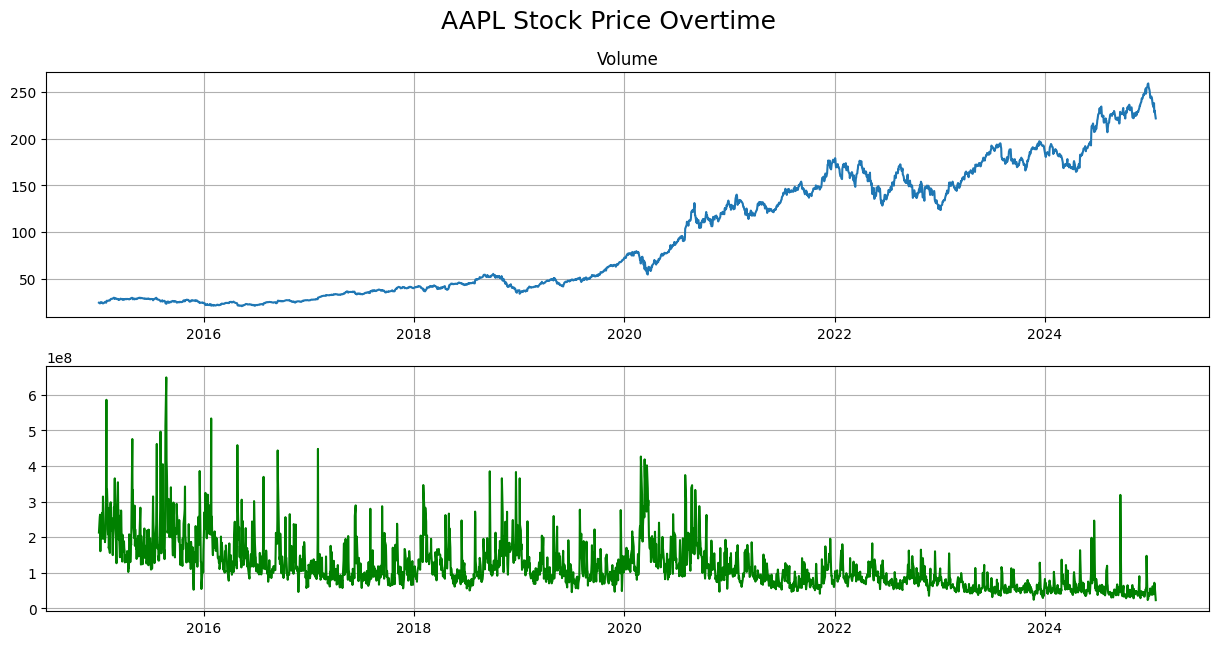

In [40]:
lineplot_stock(aapl_data, "AAPL")

<Axes: xlabel='Date', ylabel='High'>

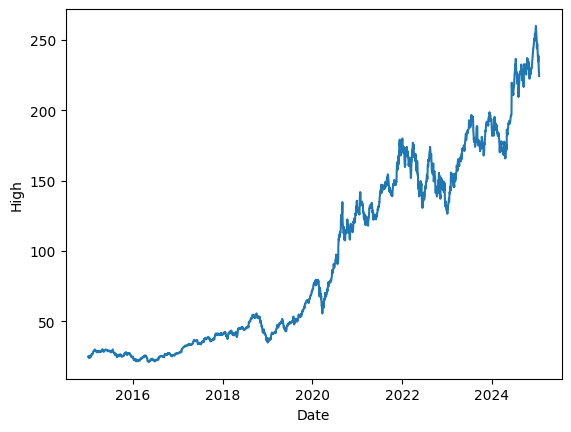

In [41]:
# experiment
sns.lineplot(data=aapl_data, x=aapl_data.index, y=aapl_data['High'])

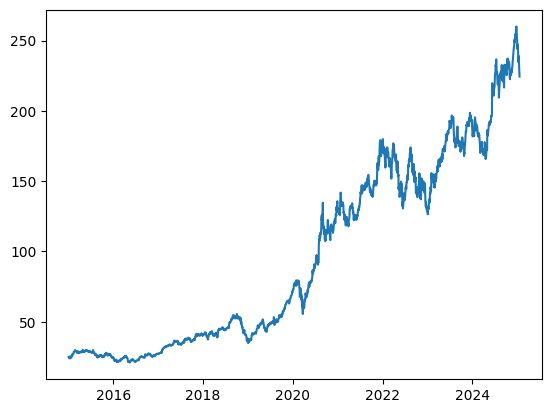

In [43]:
# experiment
plt.plot(aapl_data.index, aapl_data['High'])

## Histogram

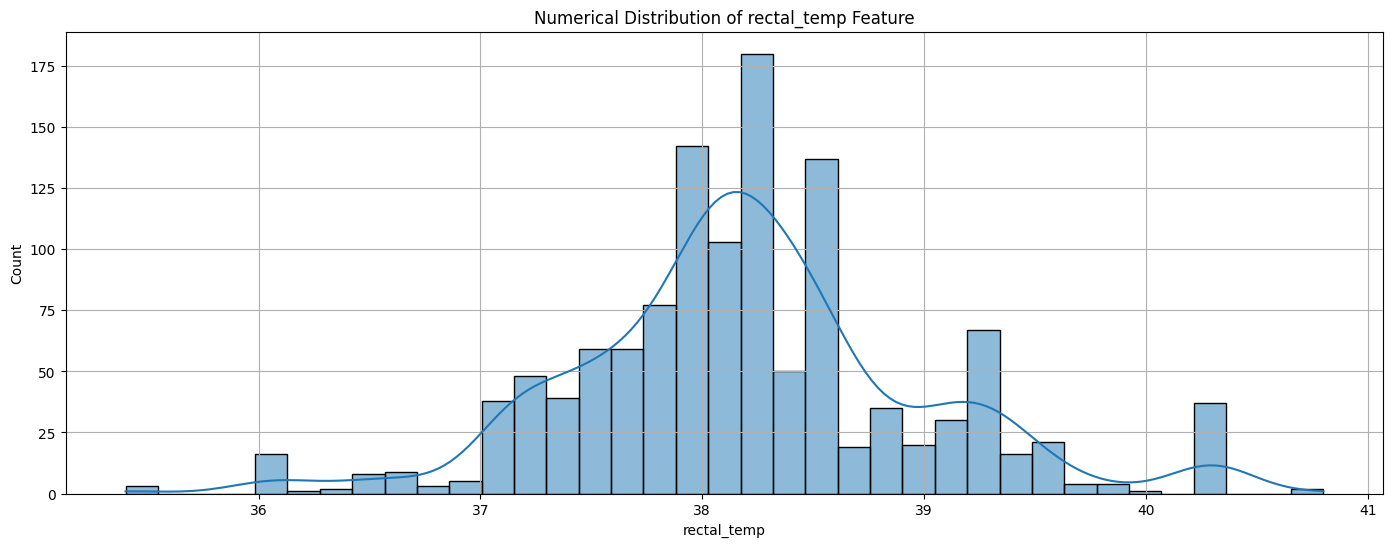

In [86]:
plt.figure(figsize=(17,6))
sns.histplot(horse_health_data['rectal_temp'], kde=True)
plt.title('Numerical Distribution of rectal_temp Feature')
plt.grid()

In [ ]:
# experiment


## Bar chart

### Simple Bar

Text(0.5, 1.0, 'Class Distribution')

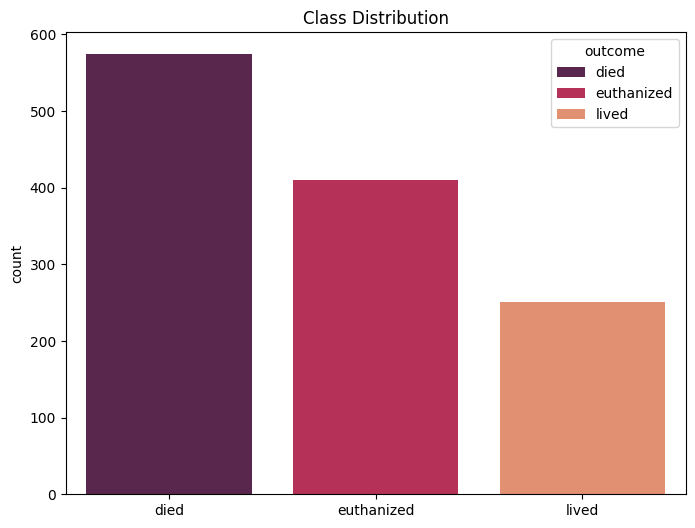

In [79]:
x = horse_health_data['outcome'].unique()
y = horse_health_data['outcome'].value_counts()

plt.figure(figsize=(8,6))
sns.barplot(x=x, y=y, palette="rocket", hue=x, legend=True)
plt.legend(title="outcome")
plt.title("Class Distribution")

In [ ]:
# experiment


### Stacked Bar

In [ ]:
# experiment


### Multiple Bar

In [ ]:
# experiment


## Scatter plot

In [ ]:
# experiment


## Pie Chart

In [ ]:
# experiment


## Heatmap

Text(0.5, 1.05, 'Feature Correlation')

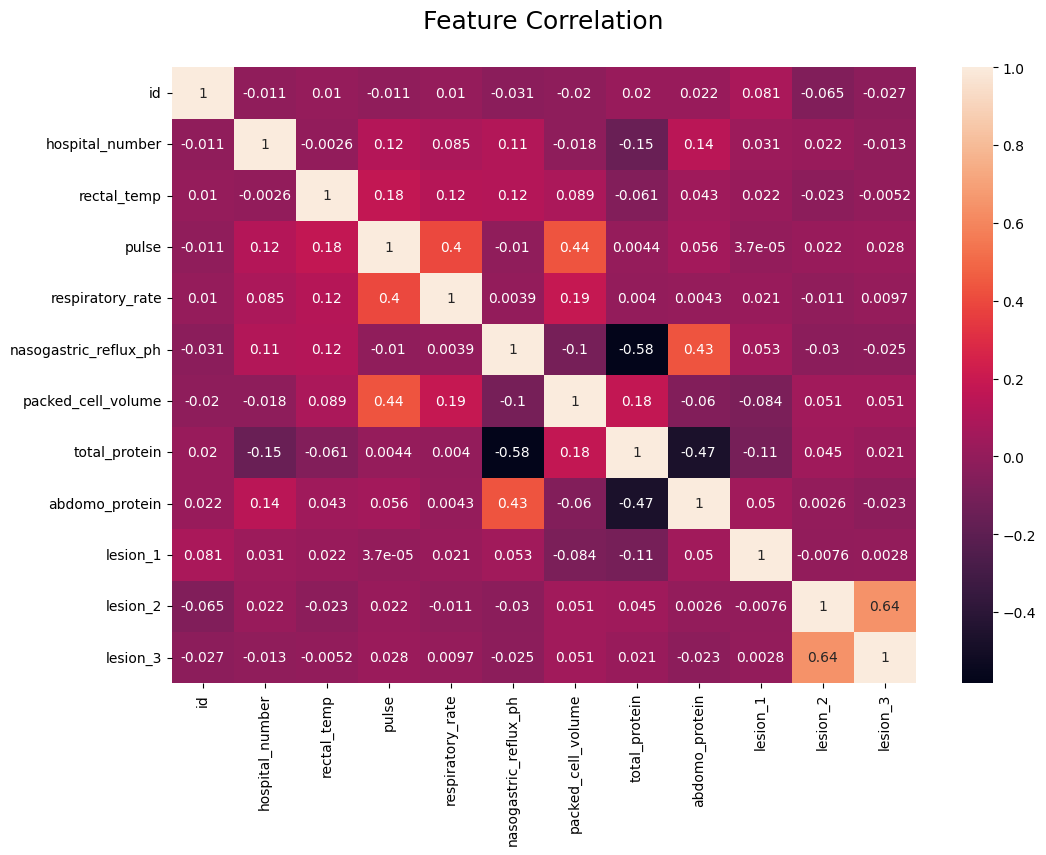

In [111]:
plt.figure(figsize=(12,8))
num_feature = horse_health_data.select_dtypes(include=['number'])
sns.heatmap(num_feature.corr(), annot=True, cmap="rocket")
plt.title('Feature Correlation', fontsize=18, y=1.05)

In [ ]:
# experiment


## Boxplot

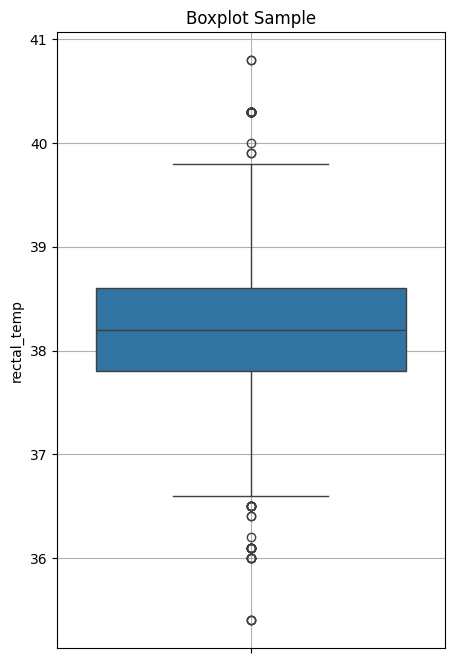

In [119]:
plt.figure(figsize=(5,8))
sns.boxplot(horse_health_data['rectal_temp'])
plt.title("Boxplot Sample")
plt.grid()

In [ ]:
# experiment
